In [50]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [51]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [52]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [53]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler and transform the data
scaled_data = scaler.fit_transform(market_data_df)

# Create a new DataFrame with the scaled data
scaled_market_data_df = pd.DataFrame(scaled_data, columns=market_data_df.columns, index=market_data_df.index)

# Display sample data after scaling
print("Sample data after scaling:")
print(scaled_market_data_df.head(10))



Sample data after scaling:
                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_p

In [56]:

# Create a DataFrame with the scaled data
scaled_market_data_df = pd.DataFrame(scaled_data, columns=numeric_data.columns, index=market_data_df.index)

# Check if the coin_name_column exists in market_data_df
if coin_name_column in market_data_df.columns:
    # Copy the crypto names from the original data
    scaled_market_data_df[coin_name_column] = market_data_df[coin_name_column]
    
    # Set the coin_name column as index
    scaled_market_data_df.set_index(coin_name_column, inplace=True)
else:
    print(f"Error: The column '{coin_name_column}' does not exist in the DataFrame.")

# Display sample data
print("Sample data after scaling:")
print(scaled_market_data_df.head(10))



Error: The column 'None' does not exist in the DataFrame.
Sample data after scaling:
                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

  

### Find the Best Value for k Using the Original Scaled DataFrame.

In [57]:

# Create a list with the number of k-values to try, using a range from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # 2. Fit the model to the data using the scaled DataFrame
    kmeans.fit(scaled_market_data_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)



c:\Users\ismet\New_Anaconda\anaconda3\envs\dev_mete\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ismet\New_Anaconda\anaconda3\envs\dev_mete\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ismet\New_Anaconda\anaconda3\envs\dev_mete\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ismet\New_Anaconda\anaconda3\envs\dev_mete\lib\site-packages\sklearn\clu

     k     inertia
0    1  287.000000
1    2  198.571818
2    3  123.190482
3    4   79.022435
4    5   65.302379
5    6   52.101806
6    7   46.035250
7    8   37.284807
8    9   32.161417
9   10   28.075253
10  11   23.890044


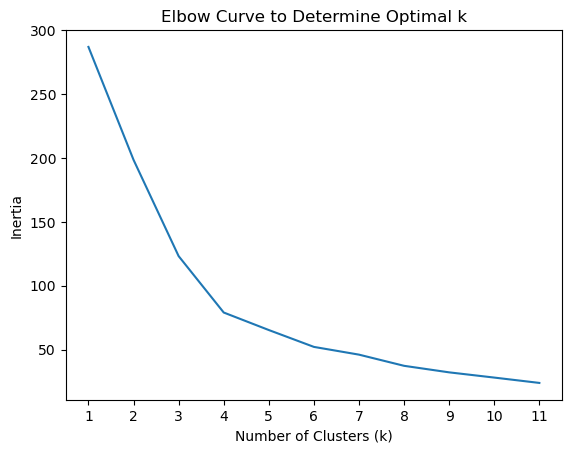

In [58]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt

plt.plot(elbow_df["k"], elbow_df["inertia"])
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve to Determine Optimal k")
plt.xticks(k_values) 
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**1:**

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [60]:
# Initialize the K-Means model using the best value for k
best_k = 1
kmeans = KMeans(n_clusters=best_k, random_state=0)



In [61]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_market_data_df)



c:\Users\ismet\New_Anaconda\anaconda3\envs\dev_mete\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ismet\New_Anaconda\anaconda3\envs\dev_mete\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=1, random_state=0)

In [63]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = kmeans.predict(scaled_market_data_df)

# View the resulting array of cluster values
print("Predicted clusters:")
print(predicted_clusters)


Predicted clusters:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [65]:
# Create a copy of the DataFrame
clustered_df = scaled_market_data_df.copy()



In [66]:

# Add a new column with the predicted clusters
clustered_df["Cluster"] = predicted_clusters

# Display sample data
print("Sample data with cluster assignments:")
print(clustered_df.head(10))


Sample data with cluster assignments:
                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  pri

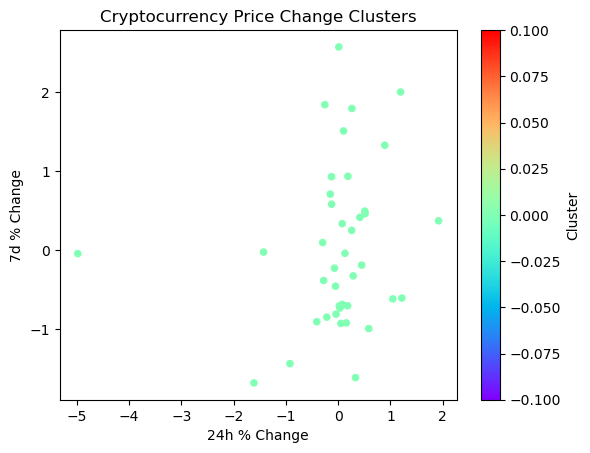

In [67]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

# Create a scatter plot using Pandas plot
ax = clustered_df.plot(
    kind="scatter",
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Cluster",
    colormap="rainbow",
    colorbar=True,
    title="Cryptocurrency Price Change Clusters"
)

ax.set_xlabel("24h % Change")
ax.set_ylabel("7d % Change")

# Display the plot
plt.show()


### Optimize Clusters with Principal Component Analysis.

In [68]:

# Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)


In [69]:

# Use the PCA model with fit_transform on the original scaled DataFrame to reduce to three principal components
pca_transformed_data = pca.fit_transform(scaled_market_data_df)

# Create a DataFrame with the PCA data
pca_df = pd.DataFrame(
    pca_transformed_data, 
    columns=["PC1", "PC2", "PC3"],
    index=scaled_market_data_df.index
)

# View the first five rows of the DataFrame
print("PCA DataFrame (first 5 rows):")
print(pca_df.head())



PCA DataFrame (first 5 rows):
                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [71]:

# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component
explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratio:")
for i, variance in enumerate(explained_variance, start=1):
    print(f"Principal Component {i}: {variance:.4f}")



Explained Variance Ratio:
Principal Component 1: 0.3720
Principal Component 2: 0.3470
Principal Component 3: 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**0.895:** 

In [158]:

# Create a DataFrame with the PCA data
pca_df = pd.DataFrame(
    pca_transformed_data, 
    columns=["PC1", "PC2", "PC3"],
    index=scaled_market_data_df.index
)

# Copy the crypto names from the original data
# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(
    pca_transformed_data, 
    columns=["PC1", "PC2", "PC3"],
    index=market_data_df.index
)

# Set the coin_id column as index
pca_df.set_index(market_data_df.index, inplace=True)

# Display sample data
print("PCA DataFrame with crypto names (first 10 rows):")
print(pca_df.head(10))



PCA DataFrame with crypto names (first 10 rows):
                      PC1       PC2       PC3
coin_id                                      
bitcoin         -0.600667  0.842760  0.461595
ethereum        -0.458261  0.458466  0.952877
tether          -0.433070 -0.168126 -0.641752
ripple          -0.471835 -0.222660 -0.479053
bitcoin-cash    -1.157800  2.041209  1.859715
binancecoin     -0.516534  1.388377  0.804071
chainlink       -0.450711  0.517699  2.846143
cardano         -0.345600  0.729439  1.478013
litecoin        -0.649468  0.432165  0.600303
bitcoin-cash-sv -0.759014 -0.201200 -0.217653


### Find the Best Value for k Using the PCA Data

In [80]:

# Create a list with the number of k-values to try
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # 2. Fit the model to the data using PCA DataFrame
    kmeans.fit(pca_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print("Elbow Curve DataFrame:")
print(elbow_df)



c:\Users\ismet\New_Anaconda\anaconda3\envs\dev_mete\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ismet\New_Anaconda\anaconda3\envs\dev_mete\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ismet\New_Anaconda\anaconda3\envs\dev_mete\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ismet\New_Anaconda\anaconda3\envs\dev_mete\lib\site-packages\sklearn\clu

Elbow Curve DataFrame:
     k     inertia
0    1  256.874086
1    2  168.811896
2    3   93.774626
3    4   49.665497
4    5   37.839466
5    6   27.720626
6    7   21.182776
7    8   17.016962
8    9   13.668325
9   10   10.484890
10  11    7.984355


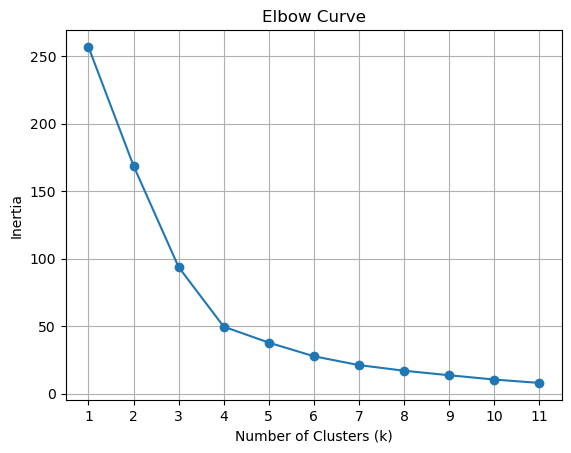

In [81]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt

plt.plot(elbow_df["k"], elbow_df["inertia"], marker="o")
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)
plt.show()


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **1:** 


* **Question:** Does it differ from the best k value found using the original data?

  * **No:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [130]:
# Initialize the K-Means model using the best value for k

best_k = 1
kmeans = KMeans(n_clusters=best_k, random_state=0)



In [131]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)

# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters = kmeans.predict(pca_df)

# View the resulting array of cluster values
print("Cluster Labels:")
print(predicted_clusters)



c:\Users\ismet\New_Anaconda\anaconda3\envs\dev_mete\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ismet\New_Anaconda\anaconda3\envs\dev_mete\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [132]:

# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters = kmeans.predict(pca_df)

# Print the resulting array of cluster values
print("Cluster Labels:")
print(predicted_clusters)



Cluster Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [133]:

# Create a copy of the DataFrame with the PCA data
clustered_pca_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clustered_pca_df["Cluster"] = predicted_clusters

# Display sample data
print("Sample data with PCA components and cluster assignments:")
print(clustered_pca_df.head(10))


Sample data with PCA components and cluster assignments:
                      PC1       PC2       PC3  Cluster
coin_id                                               
bitcoin         -0.600667  0.842760  0.461595        0
ethereum        -0.458261  0.458466  0.952877        0
tether          -0.433070 -0.168126 -0.641752        0
ripple          -0.471835 -0.222660 -0.479053        0
bitcoin-cash    -1.157800  2.041209  1.859715        0
binancecoin     -0.516534  1.388377  0.804071        0
chainlink       -0.450711  0.517699  2.846143        0
cardano         -0.345600  0.729439  1.478013        0
litecoin        -0.649468  0.432165  0.600303        0
bitcoin-cash-sv -0.759014 -0.201200 -0.217653        0


In [45]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 

import hvplot.pandas

# Create a scatter plot using hvPlot
scatter_plot = clustered_pca_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="Cluster",
    colormap="rainbow",
    title="Cryptocurrency Clusters by PCA",
    hover_cols=["coin_id", "coin_name"]
)

scatter_plot



:Scatter   [PC1]   (PC2,Cluster,coin_id)

### Determine the Weights of Each Feature on each Principal Component

In [87]:

# Use the columns from the original scaled DataFrame as the index

# Reset the index of the PCA DataFrame
clustered_pca_df = clustered_pca_df.reset_index()

# Set the index using the index of the original scaled DataFrame
clustered_pca_df = clustered_pca_df.set_index(scaled_market_data_df.index)

# Display the DataFrame
print("DataFrame with original scaled DataFrame index:")
print(clustered_pca_df.head(10))



DataFrame with original scaled DataFrame index:
                         coin_id       PC1       PC2       PC3  Cluster
coin_id                                                                
bitcoin                  bitcoin -0.600667  0.842760  0.461595        0
ethereum                ethereum -0.458261  0.458466  0.952877        0
tether                    tether -0.433070 -0.168126 -0.641752        0
ripple                    ripple -0.471835 -0.222660 -0.479053        0
bitcoin-cash        bitcoin-cash -1.157800  2.041209  1.859715        0
binancecoin          binancecoin -0.516534  1.388377  0.804071        0
chainlink              chainlink -0.450711  0.517699  2.846143        0
cardano                  cardano -0.345600  0.729439  1.478013        0
litecoin                litecoin -0.649468  0.432165  0.600303        0
bitcoin-cash-sv  bitcoin-cash-sv -0.759014 -0.201200 -0.217653        0


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **PC2 & PC3:** 
    